#### Name: Kalyani Dhawade
#### Roll No.: 31416
#### Class: TE4 [ K4 ]

## Data Visualization I

#### 1. Use the inbuilt dataset 'titanic'. The dataset contains 891 rows and contains information about the passenger who boarded the unfortunate Titanic ship. Use the Seaborn Library to see if we can find any pattern in the data.<br>2. Write a code to check how the price of the ticket (column name: 'fare') for each passenger is distributed by plotting a histogram.

In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
sns.set_style('whitegrid')

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df1 = df.copy()        # original copy
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(891, 12)

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# replacing null values with its mean value
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [12]:
# dropping columns Ticket, Cabin, Embarked
df = df.drop(['Ticket', 'Cabin', 'Embarked'], axis = 1)

In [13]:
# therefore now no null values are present in dataframe
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [14]:
df.shape

(891, 9)

### 2. Histogram

<AxesSubplot:xlabel='Fare', ylabel='Count'>

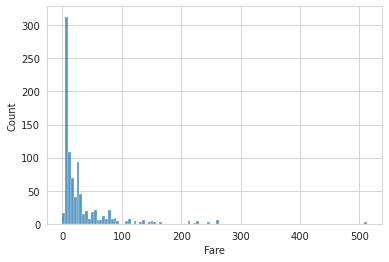

In [15]:
sns.histplot(df['Fare'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

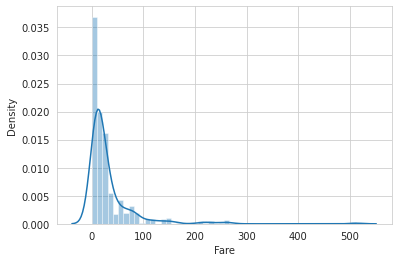

In [16]:
sns.distplot(df['Fare']) # with kernel density estimation (kde), to remove the line add 'kde = False'

<AxesSubplot:xlabel='Fare'>

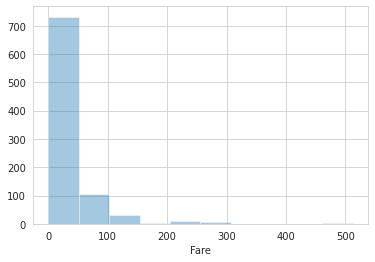

In [17]:
sns.distplot(df['Fare'], kde = False, bins = 10)

##### observation : as we can see, for more than 700 passengers, the Fare is between 0-50 dollars.

#### Jointplot
Jointplot is seaborn library specific and can be used to quickly visualize and analyze the relationship between two variables and describe their individual distributions on the same plot.

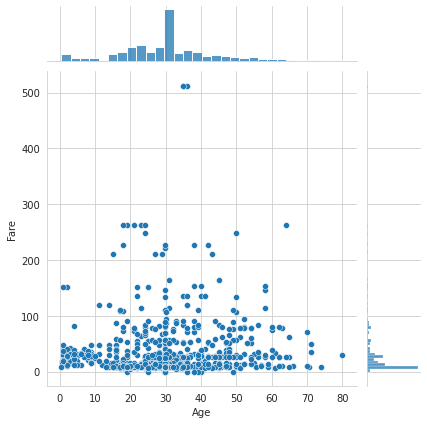

In [18]:
sns.jointplot(x='Age', y='Fare', data=df)

##### observation : There are many passengers within range 30-35 years and the fare they paid is in range 10-20 dollars.

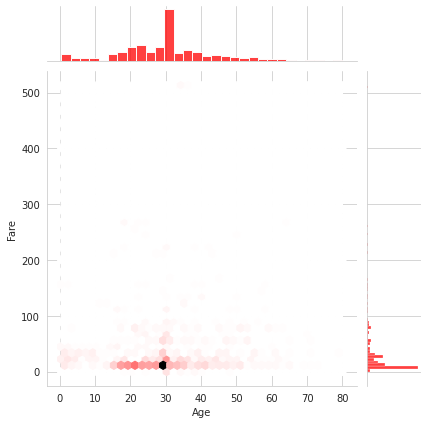

In [25]:
sns.jointplot(x='Age', y='Fare', data=df, kind='hex', color="#ff0000")

##### observation : According to concentrated area displayed by darker color, there are many passengers around 30 years and the fare they paid is in range 10-20 dollars.

### Pairplot
To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function.

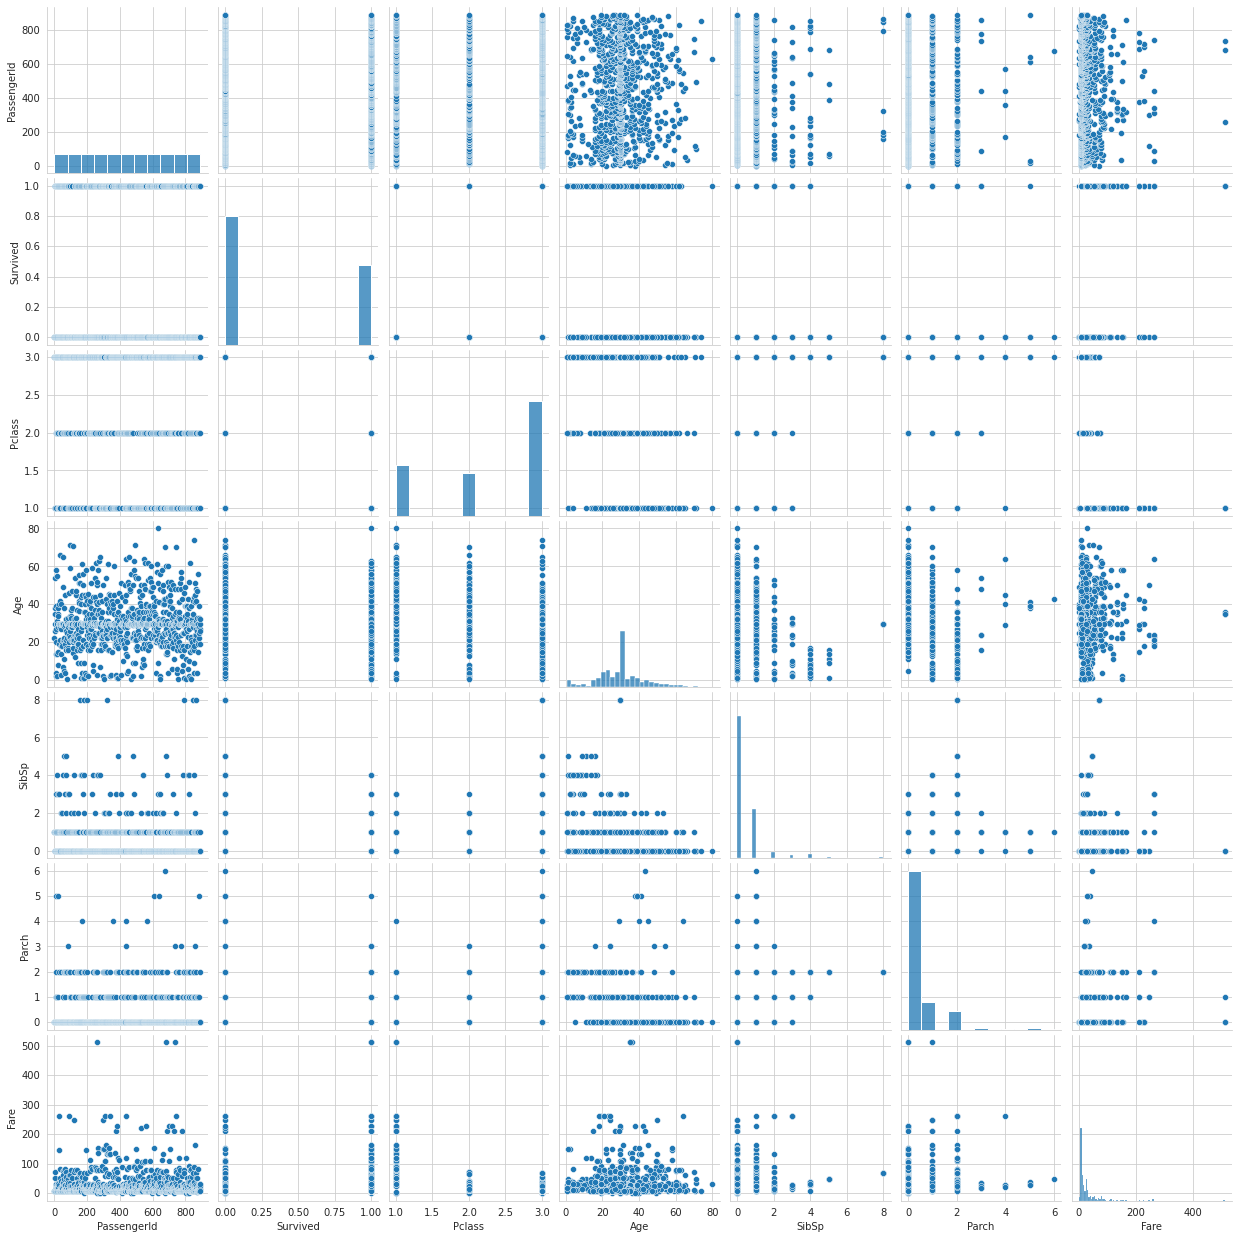

In [26]:
sns.pairplot(df)

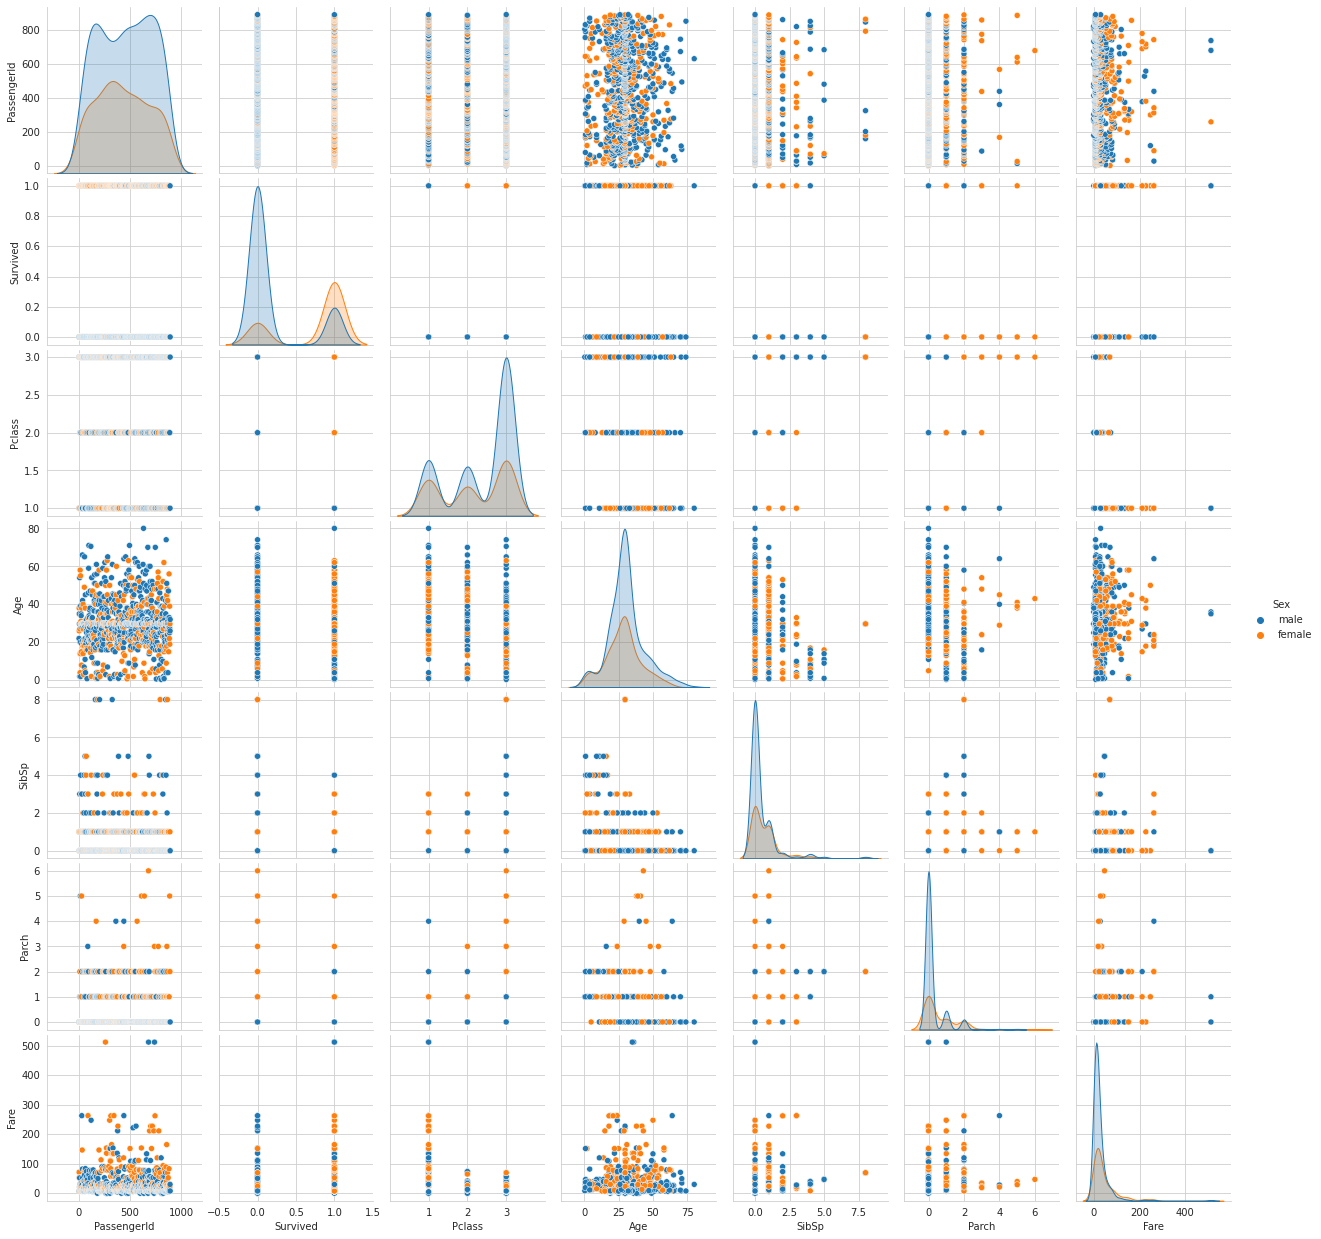

In [27]:
sns.pairplot(df, hue='Sex')

##### observation : Here in the distribution, female is in orange color & male is in blue color

### Barplot

[Text(0, 0, '0.188908'), Text(0, 0, '0.742038')]

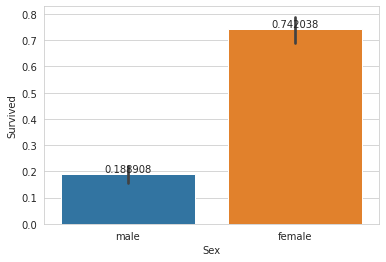

In [37]:
bx = sns.barplot(x='Sex', y='Survived', data=df)
bx.bar_label(bx.containers[0])

##### observation : no. of feamles survived > no. of males survived

[Text(0, 0, '30.5058'), Text(0, 0, '28.2167')]

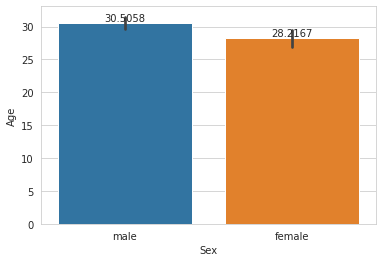

In [32]:
ax = sns.barplot(x='Sex', y='Age', data=df)
ax.bar_label(ax.containers[0])

### Boxplot

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

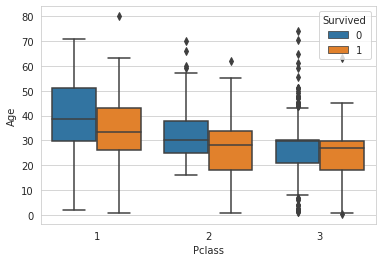

In [33]:
sns.boxplot(x='Pclass', y='Age', data=df, hue='Survived')

##### observation : passengers survived ->   Pclass    Age range
                                1      25-45
                                2      18-35
                                3      18-30

### Swarmplot
A swarmplot shows all the data points and that helps to understand the distribution in a better manner. It also helps to understand how the data is distributed across a categorical attribute and how the continuous variable is varying within a category.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

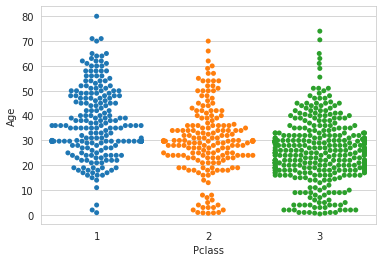

In [35]:
sns.swarmplot(x='Pclass', y='Age', data=df)